In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [44]:
movies=pd.read_csv('/content/movies.csv')
ratings=pd.read_csv('/content/ratings.csv')

In [45]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [46]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [47]:
movies.shape

(10329, 3)

In [11]:
ratings.shape

(105339, 4)

In [12]:
movies.describe

<bound method NDFrame.describe of        movieId                                title  \
0            1                     Toy Story (1995)   
1            2                       Jumanji (1995)   
2            3              Grumpier Old Men (1995)   
3            4             Waiting to Exhale (1995)   
4            5   Father of the Bride Part II (1995)   
...        ...                                  ...   
10324   146684        Cosmic Scrat-tastrophe (2015)   
10325   146878           Le Grand Restaurant (1966)   
10326   148238       A Very Murray Christmas (2015)   
10327   148626                 The Big Short (2015)   
10328   149532  Marco Polo: One Hundred Eyes (2015)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                       

In [16]:
ratings.describe

<bound method NDFrame.describe of         userId  movieId  rating   timestamp
0            1       16     4.0  1217897793
1            1       24     1.5  1217895807
2            1       32     4.0  1217896246
3            1       47     4.0  1217896556
4            1       50     4.0  1217896523
...        ...      ...     ...         ...
105334     668   142488     4.0  1451535844
105335     668   142507     3.5  1451535889
105336     668   143385     4.0  1446388585
105337     668   144976     2.5  1448656898
105338     668   148626     4.5  1451148148

[105339 rows x 4 columns]>

In [17]:
genres=[]
for genre in movies.genres:

    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)

In [19]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,110,4.0,1217896150,Braveheart (1995),Action|Drama|War
6,1,150,3.0,1217895940,Apollo 13 (1995),Adventure|Drama|IMAX
7,1,161,4.0,1217897864,Crimson Tide (1995),Drama|Thriller|War
8,1,165,3.0,1217897135,Die Hard: With a Vengeance (1995),Action|Crime|Thriller
9,1,204,0.5,1217895786,Under Siege 2: Dark Territory (1995),Action


In [21]:
df1=df.groupby(['title'])[['rating']].sum()
high_rated=df1.nlargest(20,'rating')
high_rated.head(10)

,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5
"Matrix, The (1999)",1113.0
Jurassic Park (1993),1076.0
Schindler's List (1993),1065.5
Braveheart (1995),1019.0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['rating'], **{})
chart

<BarContainer object of 20 artists>

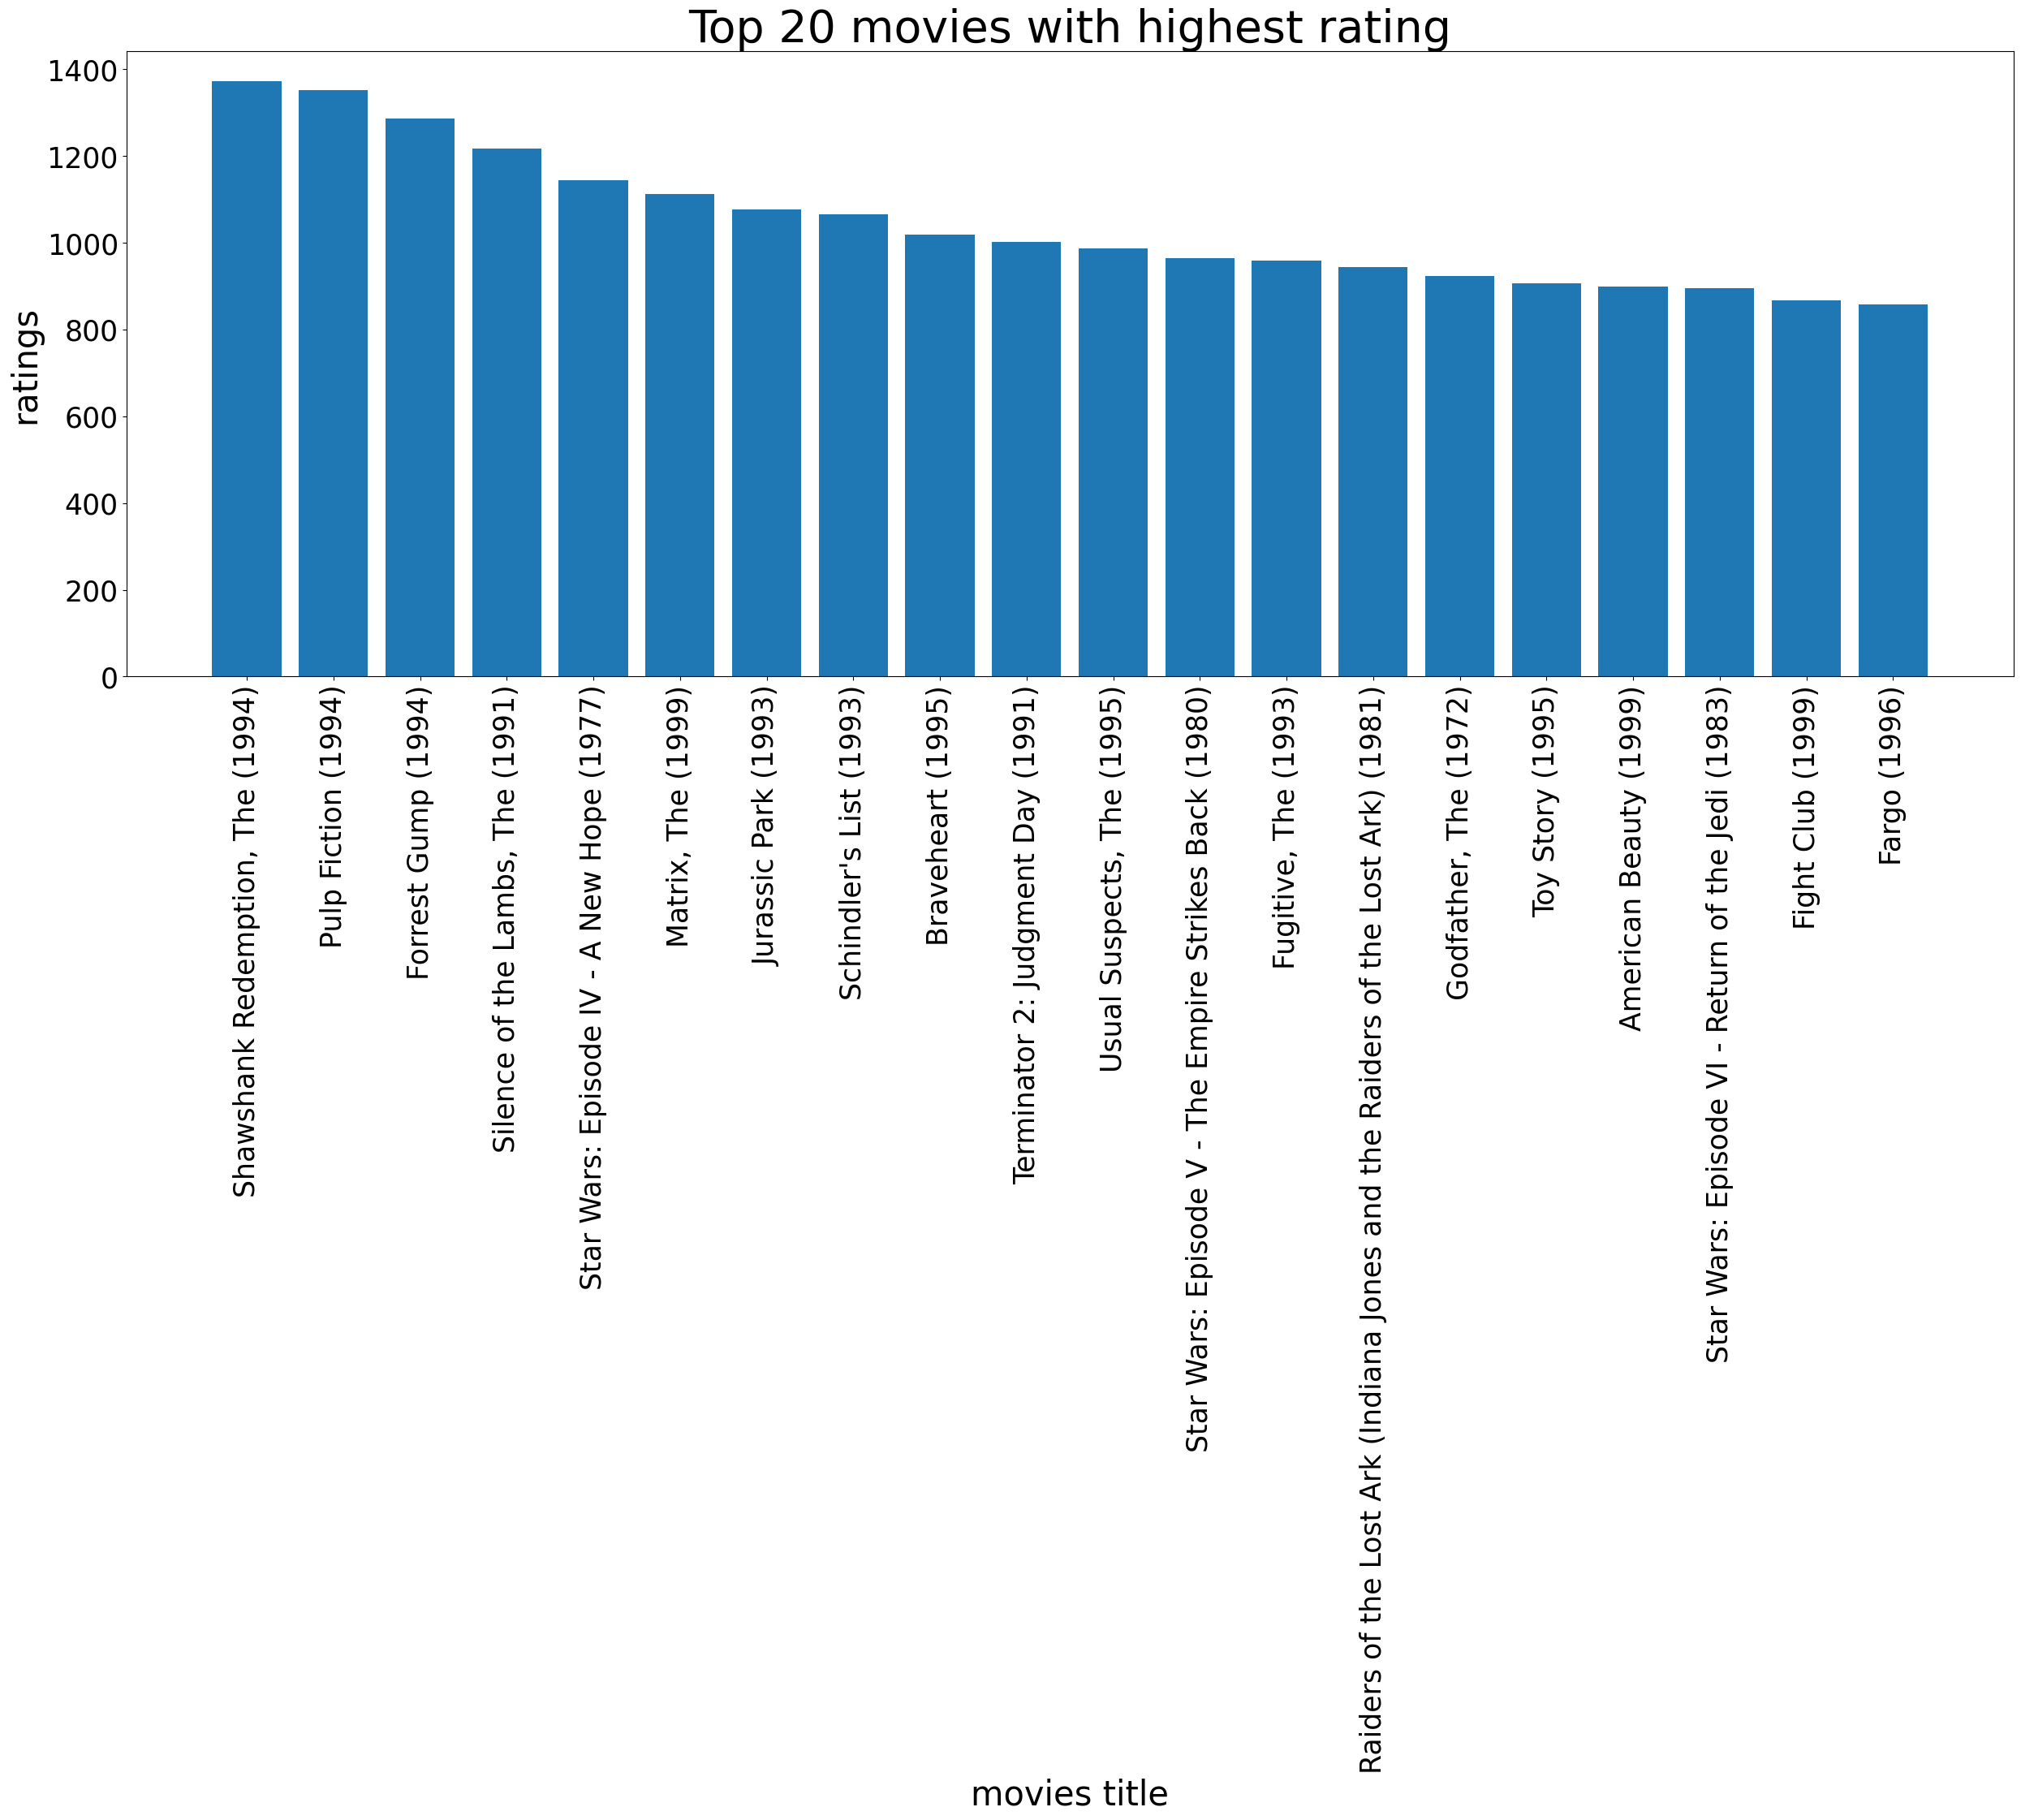

In [27]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3)

In [28]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['rating'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['rating'], **{})
chart

<BarContainer object of 20 artists>

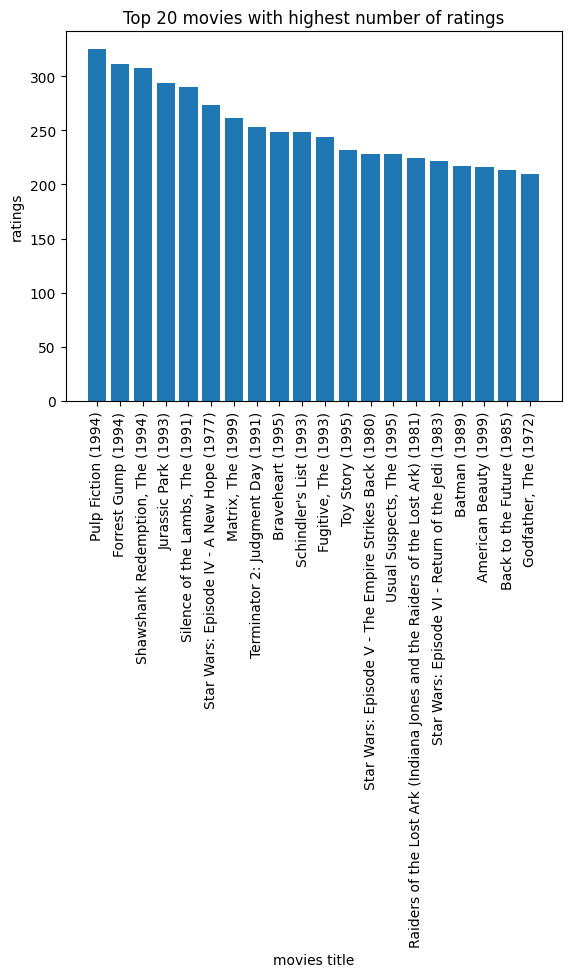

In [35]:
plt.figure()
plt.title('Top 20 movies with highest number of ratings')
plt.xticks(rotation=90)
plt.xlabel('movies title')
plt.ylabel('ratings')

plt.bar(rating_count_20.index,rating_count_20.rating)

In [36]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [37]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [39]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [42]:
recommendations('Casino (1995)')

29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
35                               Dead Man Walking (1995)
89                               Hate (Haine, La) (1995)
105                Young Poisoner's Handbook, The (1995)
215                              The Glass Shield (1994)
217                            Heavenly Creatures (1994)
237                                 Little Odessa (1994)
252                              New Jersey Drive (1995)
255                            Once Were Warriors (1994)
279                     Shawshank Redemption, The (1994)
350                                 Jason's Lyric (1994)
358                                 Above the Rim (1994)
379                                 Carlito's Way (1993)
662                              American Buffalo (1996)
691                               Cyclo (Xich lo) (1995)
695                                Godfather, The (1972)
780                          Angel on My Shoulder (1946)
881                            